https://www.youtube.com/watch?v=EioJ902VCmk&list=PLJOzdkh8T5kp99tGTEFjH_b9zqEQiiBtC&index=18

**задача ранжирования**

$X$ - множество объектов   
$x_1...x_l$ - упорядоченный набор объектов   

отношение порядка на $X$   

построить $a : X \rightarrow \mathbb{R}$  
$i<j \Rightarrow a(x_i)<a(x_j)$

**линейная модель ранжирования**  
$a(x) = <x,w>$  
$x = ( f_1(x),...f_n(x) ) \in  \mathbb{R}^n$ - вектор признак объекта x  
$w$ - параметры  

**пример**

$D$ - документы  
$Q$ - запросы  

$X = D х Q$ - ответы на запросы

$у: X  \rightarrow R$ - оценка релевантности

порядок определён только на документах найденных по одному запросу  
т.е. релевантность документов $D$ относительно запроса $q$

_отношение порядка на учебном наборе обычно строим руками_

**TF-IDF(q,d) как мера релевантности**


$\sum\limits_{w \in q} TF(w,d)\cdot IDF(w) = \sum\limits_{w\in q}  n_{dw} \cdot \log( N/N_w )$

**google page rank**

рекуррентный принцип:  
документ важен если на него ссылаются другие важные документы  
которые не ссылаются на на другие документы  

**точность (средняя) ранжирования** [28:18]

$y(q,d)$ - релевантность  
$Y = \{0,1\}$ - бинарная разметка, релевантен/нерелевантен

$а(q,d)$ - функция ранжирования


точность ранжирования (доля релевантных) по запросу q для первых $n$ документов:

$$P_n(q) = \frac{1}{n} \sum\limits_{i=1}^n y\left(q,d_q^{(i)}\right) $$


средняя точность ранжирования по запросу q:

$$ AP(q) = \frac{ \sum\limits_n \left( P_n(q) \cdot y\left(q,d_q^{(n)}\right) \right) }{ \sum\limits_n y\left(q,d_q^{(n)}\right) }$$


общая средняя точность ранжирования (модели):

$$MAP = \frac{1}{|Q|} \sum_{q\in Q} AP(q) $$

доля дефектных пар, доля инверсий порядка среди первых $n$ документов по запросу $q$

$$ DP_n(q) = \frac{2}{n(n-1)} \sum_{i<j} \left[ y(q,d_q^{(i)})<y(q,d_q^{(j)})\right] $$

где $d_q^{(i)}$ - $i$-тый документ по убыванию $a(q,d)$

связь с коэффициентом ранговой корреляции ($\tau$ Кенделла)

$$\tau(a,y) = 1 - 2\cdot DP_n(q)$$

связь с AUC (бинарная классификация $Y=\{-1,+1\}; a:X\rightarrow Y$)

$$ AUC_n(q) = \frac{1}{\mathscr{l}_-\mathscr{l}_+} \sum\limits_{i,j=1}^{n}\left[y_i>y_j\right]\cdot\left[a(x_i)<a(x_j)\right] =  \frac{n(n-1)}{2\mathscr{l}_-\mathscr{l}_+}DP_n(q) $$

дисконтированная взвешенная сумма выигрышей

$$DCG_n = \sum\limits^n_{i=1} G_q(d_q^{(i)}) \cdot D(i) $$
где  
$G_q(d) =  \left( 2^{y(q,d)} - 1\right)$  - больший вес релевантным документам   
$D(i) = 1/\log_2(i+1)$  - больший вес в начале выдачи

нормированная дисконтированная взвешенная сумма выигрышей

$$ NDCG_n(q) = \frac{DCG_n(q)}{\max DCG_n(q) }$$

Яndex pFound - модель поведения пользователя


$$pFound_n(q) = \sum\limits_{i=1}^{n} P_i \cdot y(q,d_q^{(i)})$$


$P_1 = 1$  
$P_{i+1} = P_i \cdot \left(1-y(q,d_q^{(i)})\right)\cdot(1-P_{out}) $

$P_i$ - вероятность того, что пользователь будет просматривать $i$-тый документ (дойдёт до $i$)  
$P_{out}$ - вероятность того, что пользователь бросит поиск не найдя ответа


y(q,d) | name
--- |:--- 
0.61 |vital
0.41 |useful
0.14 |relevant+
0.07 |relevant+
0.00 |not relevant

$$P_{out}=0.15$$


подходы к ранжированию

- point-wise поточечно, строим функционал по каждому объекту отдельно
- pair-wise попарно, строим функционал с парами объектов с учётом порядка на этой паре
- list-wise списком, оцениваем сразу список объектов и отношения на них

модели ранжирования (pair-wise)

отступ:

$$M_{ij} = a(x_j) - a(x_i)$$

переход к гладкому функционалу качества

$$Q(a) = \sum\limits_{i<j} \left[ M_{ij} < 0  \right] \leq \sum\limits_{i<j} \mathscr{L} \left( M_{ij} \right) \rightarrow \min $$

где  
$a(x)$ - алгоритм ранжирования  
$\mathscr{L}(M)$ - убывающая непрерывная функция отступа  

ranking SVM

реализует $m$ разделяющих полос между объектами с дискретными оценками ранга (одна из $m$ возможных оценок для одного объекта
)

парное ранжирование

rankingNet

$a(x)=<w,x>$ линейная модель

$\mathscr{L}(M) = \log(1+\exp(-\sigma M) )$ гладкая апроксимация функционала качества

$\sigma$ - параметр

шаг SGD:

$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i)$$


lambdaRank

домножение изменения на NDCG при перестановке $x_i$ $x_j$ приводит к оптимизации NDCG (можно использовать MAP)


$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i) \cdot |\Delta NDCG_{ij}| $$

---

Яndex

50K оценок асессоров за месяц

800 признаков добавлено за 4 года

технология MatrixNet

FML среда для тестирования методов ML

---

MathJax - библиотека для отображения математических формул (краткий справочник)

https://radioprog.ru/post/74



MathML Examples

https://elsenaju.eu/mathml/MathML-Examples.htm

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3


----

**rankingNet**


парное ранжирование


$a(x)=<w,x>$ линейная модель

$\mathscr{L}(M) = \log(1+\exp(-\sigma M) )$ гладкая апроксимация функционала качества

$\sigma$ - параметр

шаг SGD (формируем порядок $i<j$):

$$w:= w + \eta \cdot \frac{\sigma}{1+\exp\left(\sigma \left<x_j-x_i,w\right> \right)}\cdot(x_j-x_i)$$


In [1]:
import numpy as np
import numpy.random as rng
from itertools import product
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=2) # вывод на печать чисел до 2 знака

In [3]:
dim = 7
n = 100

X = rng.rand(n,dim).astype(np.float32)
X.shape

(100, 7)

In [4]:
# X.sort(axis=0)
# X = rng.permutation(X)

In [5]:
sig = .01
lsp = .05

batch_size = 5
n_epoch = 201

w  = rng.rand(dim)

l = []

In [6]:
np.argsort( X.dot(w) )

array([75, 87, 57, 37, 44, 93, 19, 41, 40, 27, 92, 16, 13, 38, 81, 22, 95,
        3, 88,  1, 53, 50, 24, 94, 39, 51, 33, 36, 67, 17, 60, 18, 54, 78,
       82, 10, 59, 99, 68, 65, 72, 69, 45, 90, 79, 89, 34, 43, 26, 56, 52,
       55, 91, 66, 63, 21, 15, 83, 98, 29, 14, 77, 58, 76, 23, 49, 84,  8,
       31, 32,  5, 20, 61, 86, 28, 46, 42, 97,  7, 11, 70, 25, 73, 85, 71,
       80,  2, 62, 74, 64, 96, 35, 47,  0,  9, 30, 48,  6, 12,  4])

In [7]:
def loss(x0,x1,w,sig=sig):
    d = x0.dot(w) - x1.dot(w) 
    return np.log(1.+np.exp(-sig*d))

In [8]:
def grad(x0,x1,sig=sig):
    d = x0 - x1
    return ( sig / ( 1. + np.exp( sig* d.dot(w) ) ) )[:,np.newaxis]*d

In [9]:
for _ in range(n_epoch):
    idx = rng.permutation([ [i,j] for i,j in product(range(n),range(n)) if i<j])
    for ii in np.split(idx,batch_size ):
        x0 = X[ ii[:,0],:]
        x1 = X[ ii[:,1],:]
        l.append( loss(x0,x1,w).sum() )
        w += lsp * grad(x0,x1).sum(axis=0) 

In [10]:
np.argsort( X.dot(w) )

array([60, 20, 36, 13, 90, 75, 41, 94, 92, 93, 83,  1, 40, 32, 19, 57, 54,
       44, 37, 22, 95, 86, 10, 61, 58, 97, 98, 29, 78, 65, 87, 49, 74, 18,
       38, 66, 27, 70, 88, 99, 53, 91, 81, 25, 84, 73, 85, 76, 17, 16, 68,
        8, 43, 59, 82, 72, 67, 24, 23, 50, 21, 14, 77, 71, 45,  6, 51, 62,
       39, 35, 47, 33, 46, 96, 28, 63, 31, 69, 11, 15, 56, 79, 52, 42, 64,
        7,  5, 26, 34, 89,  2, 12, 55,  3,  9, 30, 80,  4,  0, 48])

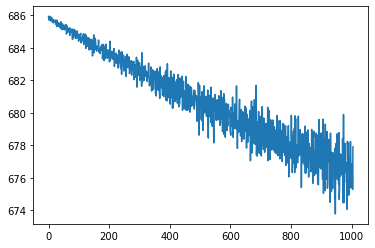

In [11]:
plt.plot(l)

In [ ]:
# np.array_split
# np.split(idx,100)

In [ ]:
# idx = rng.permutation([ [i,j] for i,j in product(range(n),range(n))])

# d = X[ idx[:,0],:] - X[ idx[:,1],:]

# dw = (lsp * ( sig / ( 1. + np.exp( sig* d.dot(w) ) ) )[:,np.newaxis]*d).sum(axis=0)

In [ ]:
# for i,j in product(range(n),range(n)):
# [ [i,j] for i,j in product(range(n),range(n)) ]
# sig